In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import scipy.io
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
import sklearn.datasets
import re
import seaborn as sns
import datetime as dt
import time
import copy
from tensorflow.python.framework import ops
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#from DNN_utils import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# read the preprocessed data
rawdata = pd.read_csv('raw_data.csv')

In [3]:
# split the data
#y = list(rawdata['target'])
#X = rawdata[numCols+catCols]
#train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=1)
#train_X, val_X, train_y, val_y = train_test_split(train_X,train_y,test_size=0.2,random_state=1)


In [4]:
# split the data
y = list(rawdata['target'])
X = rawdata
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=1)
train_X, val_X, train_y, val_y = train_test_split(train_X,train_y,test_size=0.2,random_state=1)
#testdata.to_csv('test.csv')


In [5]:
catCols = ['BorrName', 'BorrCity', 'BorrState','CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ApprovalFiscalYear', 'DeliveryMethod', 'subpgmdesc','NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType'
       ]
numCols = ['BorrZip','CDC_Zip','ThirdPartyDollars', 'GrossApproval','InitialInterestRate', 'TermInMonths','Borrgsp','unemploy_bow','unemploy_pro','SP500','borrthird','borrpro','borrCDC','total','termint']

train_X = train_X[numCols+catCols]
val_X = val_X[numCols+catCols]
test_X = test_X[numCols+catCols]

In [135]:
# achieved DNN auc 0.81
catCols1 = ['BorrCity', 'BorrState','CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ApprovalFiscalYear', 'NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType'
       ]
numCols1 = ['BorrZip','ThirdPartyDollars', 'GrossApproval','InitialInterestRate', 'TermInMonths','Borrgsp','unemploy_bow','unemploy_pro','SP500','borrCDC','total','termint']

train_X1 = train_X[numCols1+catCols1]
val_X1 = val_X[numCols1+catCols1]
test_X1 = test_X[numCols1+catCols1]

train_y1 = copy.deepcopy(train_y)
val_y1 = copy.deepcopy(val_y)
test_y1 = copy.deepcopy(test_y)


In [134]:
# still 0.81
catCols1 = ['BorrCity', 'BorrState','CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ApprovalFiscalYear', 'NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState'
       ]
numCols1 = ['BorrZip','ThirdPartyDollars', 'GrossApproval','InitialInterestRate', 'TermInMonths','Borrgsp','unemploy_bow','unemploy_pro','SP500','borrCDC','total']

train_X1 = train_X[numCols1+catCols1]
val_X1 = val_X[numCols1+catCols1]
test_X1 = test_X[numCols1+catCols1]

train_y1 = copy.deepcopy(train_y)
val_y1 = copy.deepcopy(val_y)
test_y1 = copy.deepcopy(test_y)


In [6]:
# try to drop features
catCols1 = ['BorrCity', 'BorrState','CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ApprovalFiscalYear', 'NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState'
       ]
numCols1 = ['BorrZip','ThirdPartyDollars', 'GrossApproval', 'InitialInterestRate','TermInMonths','Borrgsp','unemploy_bow','unemploy_pro','SP500','borrCDC','total']

train_X1 = train_X[numCols1+catCols1]
val_X1 = val_X[numCols1+catCols1]
test_X1 = test_X[numCols1+catCols1]

train_y1 = copy.deepcopy(train_y)
val_y1 = copy.deepcopy(val_y)
test_y1 = copy.deepcopy(test_y)


## Baseline: Logistic Regression

In [108]:
# standardization and one-hot encoding
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numCols),
                                               ('cat', categorical_transformer, catCols)])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

clf.fit(train_X, train_y)
print("model score: %.3f" % clf.score(val_X, val_y))
print(classification_report(val_y, clf.predict(val_X)))
print(roc_auc_score(val_y, clf.predict_proba(val_X)[:,1]))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


model score: 0.864


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7344
           1       0.62      0.42      0.50      1411

   micro avg       0.86      0.86      0.86      8755
   macro avg       0.76      0.68      0.71      8755
weighted avg       0.85      0.86      0.85      8755

0.8398791243404993


In [110]:
print("model score: %.3f" % clf.score(test_X, test_y))
print(classification_report(test_y, clf.predict(test_X)))
print(roc_auc_score(test_y, clf.predict_proba(test_X)[:,1]))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


model score: 0.869
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      9160
           1       0.65      0.42      0.51      1783

   micro avg       0.87      0.87      0.87     10943
   macro avg       0.77      0.69      0.72     10943
weighted avg       0.85      0.87      0.86     10943

0.8421619026859692


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8421619026859692


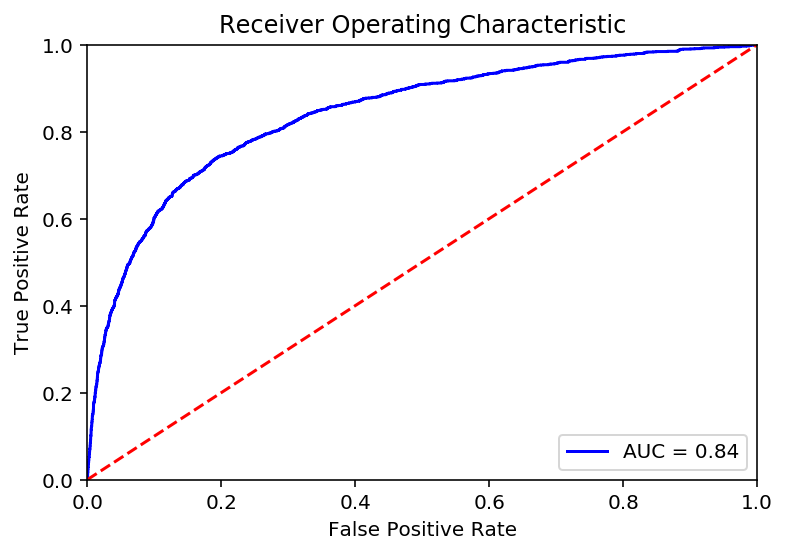

In [112]:
# ROC_AUC curve for logistic regression
probs = clf.predict_proba(test_X)
preds_log = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds_log)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression with Regularization

#### L1

In [150]:
from sklearn.feature_selection import SelectKBest
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numCols),
                                               ('cat', categorical_transformer, catCols)])
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l1'))])

clf.fit(train_X, train_y)
print("model score: %.3f" % clf.score(val_X, val_y))
print(classification_report(val_y, clf.predict(val_X)))
print(roc_auc_score(val_y, clf.predict_proba(val_X)[:,1]))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-pack

model score: 0.865
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7344
           1       0.62      0.43      0.50      1411

   micro avg       0.87      0.87      0.87      8755
   macro avg       0.76      0.69      0.71      8755
weighted avg       0.85      0.87      0.85      8755

0.8427877214355306


In [151]:
print("model score: %.3f" % clf.score(test_X, test_y))
print(classification_report(test_y, clf.predict(test_X)))
print(roc_auc_score(test_y, clf.predict_proba(test_X)[:,1]))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


model score: 0.868
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      9160
           1       0.65      0.42      0.51      1783

   micro avg       0.87      0.87      0.87     10943
   macro avg       0.77      0.69      0.71     10943
weighted avg       0.85      0.87      0.86     10943

0.8457192443431045


In [115]:
probs = clf.predict_proba(test_X)
preds_log_l1 = probs[:,1]

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


### Select Features after One-Hot

In [152]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name


In [153]:
coef = clf.named_steps['classifier'].coef_
feature_names = get_column_names_from_ColumnTransformer(clf.named_steps['preprocessor'])
for i in range(len(feature_names)):
    if feature_names[i][0] == 'x':
        flag = i
        break
cat_names = feature_names[flag:]
select = []
for i in range(coef.shape[1]):
    if coef[0,i] != 0:
        select.append(i)
select_features = [feature_names[i] for i in select]
len(select_features)

2330

In [31]:
#clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names()

In [154]:
for i in range(len(select_features)):
    if select_features[i][0] == 'x':
        flag = i
        break

In [155]:
num_select = select_features[:flag]
cat_select = select_features[flag:]
inds = []
for i in range(len(cat_select)):
    inds.append(cat_names.index(cat_select[i]))

#### L2

In [116]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l2'))])

clf.fit(train_X, train_y)
print("model score: %.3f" % clf.score(val_X, val_y))
print(classification_report(val_y, clf.predict(val_X)))
print(roc_auc_score(val_y, clf.predict_proba(val_X)[:,1]))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-pack

model score: 0.864
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7344
           1       0.62      0.42      0.50      1411

   micro avg       0.86      0.86      0.86      8755
   macro avg       0.76      0.68      0.71      8755
weighted avg       0.85      0.86      0.85      8755

0.8398791243404993


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [117]:
print("model score: %.3f" % clf.score(test_X, test_y))
print(classification_report(test_y, clf.predict(test_X)))
print(roc_auc_score(test_y, clf.predict_proba(test_X)[:,1]))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


model score: 0.869
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      9160
           1       0.65      0.42      0.51      1783

   micro avg       0.87      0.87      0.87     10943
   macro avg       0.77      0.69      0.72     10943
weighted avg       0.85      0.87      0.86     10943

0.8421619026859692


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [118]:
probs = clf.predict_proba(test_X)
preds_log_l2 = probs[:,1]

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


## Tree Models

### Gradient Boosting

In [119]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y


In [120]:
modelC, pred_val_y = run_lgbc(train_X, train_y, val_X, val_y)
print(classification_report(val_y, modelC.predict(val_X)>0.5))
print(roc_auc_score(val_y, modelC.predict(val_X)))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.314329
[200]	valid_0's binary_logloss: 0.314977
Early stopping, best iteration is:
[101]	valid_0's binary_logloss: 0.314247
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7344
           1       0.66      0.42      0.51      1411

   micro avg       0.87      0.87      0.87      8755
   macro avg       0.78      0.69      0.72      8755
weighted avg       0.86      0.87      0.86      8755

0.8529489932046526


In [121]:
print(classification_report(test_y, modelC.predict(test_X)>0.5))
print(roc_auc_score(test_y, modelC.predict(test_X)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      9160
           1       0.68      0.40      0.50      1783

   micro avg       0.87      0.87      0.87     10943
   macro avg       0.78      0.68      0.71     10943
weighted avg       0.86      0.87      0.86     10943

0.8554091651624881


In [127]:
preds_lgbm = modelC.predict(test_X)

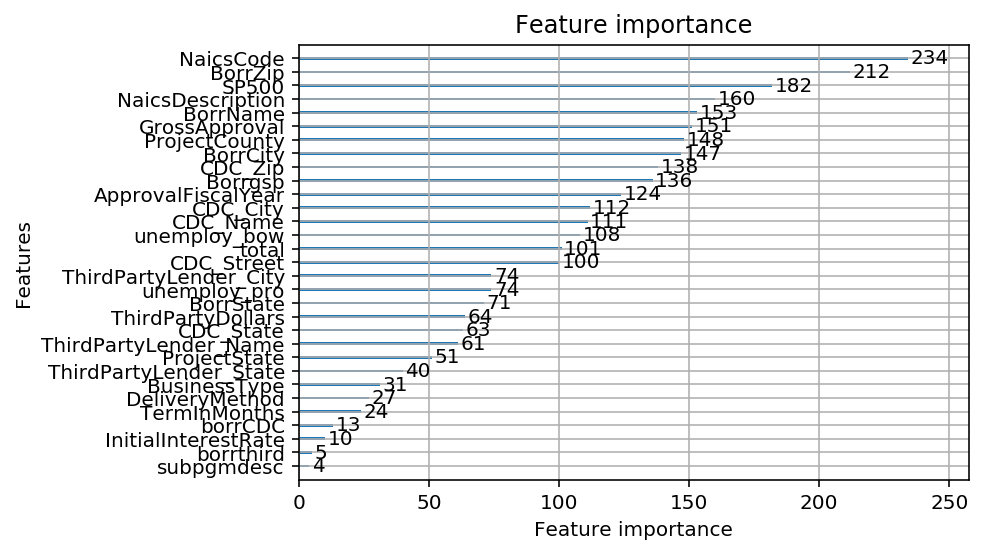

In [122]:
lgb.plot_importance(modelC)

In [123]:
fn = modelC.feature_name()
fi = list(modelC.feature_importance())
for i in range(len(fn)):
    print(fn[i],fi[i])

BorrZip 212
CDC_Zip 138
ThirdPartyDollars 64
GrossApproval 151
InitialInterestRate 10
TermInMonths 24
Borrgsp 136
unemploy_bow 108
unemploy_pro 74
SP500 182
borrthird 5
borrpro 0
borrCDC 13
total 101
termint 0
BorrName 153
BorrCity 147
BorrState 71
CDC_Name 111
CDC_Street 100
CDC_City 112
CDC_State 63
ThirdPartyLender_Name 61
ThirdPartyLender_City 74
ThirdPartyLender_State 40
ApprovalFiscalYear 124
DeliveryMethod 27
subpgmdesc 4
NaicsCode 234
NaicsDescription 160
ProjectCounty 148
ProjectState 51
BusinessType 31


### Default Rate Prediction on the Best Model

In [17]:
samples = pd.read_csv('samples.csv')
pred_X = samples[numCols+catCols]
# 1 year
pred_y = samples['target1']
pred_prob1 = modelC.predict(pred_X)
print(classification_report(pred_y, modelC.predict(pred_X)>0.5))
print(roc_auc_score(pred_y, modelC.predict(pred_X)))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96       489
           1       0.00      0.00      0.00        11

   micro avg       0.93      0.93      0.93       500
   macro avg       0.49      0.48      0.48       500
weighted avg       0.96      0.93      0.94       500

0.5318832496746607


In [18]:
# 5 year
pred_y = samples['target5']
pred_prob5 = modelC.predict(pred_X)
print(classification_report(pred_y, modelC.predict(pred_X)>0.5))
print(roc_auc_score(pred_y, modelC.predict(pred_X)))


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       461
           1       0.48      0.28      0.35        39

   micro avg       0.92      0.92      0.92       500
   macro avg       0.71      0.63      0.66       500
weighted avg       0.91      0.92      0.91       500

0.7978752989598976


### Select features2

In [156]:
data_scaler = StandardScaler()
train_num = data_scaler.fit_transform(train_X[numCols])
val_num = data_scaler.transform(val_X[numCols])
test_num = data_scaler.transform(test_X[numCols])
train_num_df = pd.DataFrame(train_num,columns = numCols)[num_select]
train_num_df = train_num_df.reset_index(drop=True)
val_num_df = pd.DataFrame(val_num,columns = numCols)[num_select]
val_num_df = val_num_df.reset_index(drop=True)
test_num_df = pd.DataFrame(test_num,columns = numCols)[num_select]
test_num_df = test_num_df.reset_index(drop=True)

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  af

In [157]:
train_cat = train_X[catCols]
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(train_cat)
feature_names = [str(i) for i in list(one_hot.get_feature_names())]
for i in range(4):
    if i == 0:
        train_piece = one_hot.transform(train_cat[i*10000:(i+1)*10000]).toarray()[:,inds]
        val_piece = one_hot.transform(val_X[catCols]).toarray()[:,inds]
        test_piece = one_hot.transform(test_X[catCols]).toarray()[:,inds]    
    elif i == 3:
        train_piece = np.vstack((train_piece,one_hot.transform(train_cat[30000:]).toarray()[:,inds]))      
    else:
        train_piece = np.vstack((train_piece,one_hot.transform(train_cat[i*10000:(i+1)*10000]).toarray()[:,inds]))

train_cat_df = pd.DataFrame(train_piece,columns = cat_select)
val_cat_df = pd.DataFrame(val_piece,columns = cat_select)
test_cat_df = pd.DataFrame(test_piece,columns = cat_select)
newcatCols = list(train_cat_df.columns)

In [158]:
gbtrain_X = pd.concat([train_num_df,train_cat_df],axis = 1)
gbval_X = pd.concat([val_num_df,val_cat_df],axis = 1)
gbtest_X = pd.concat([test_num_df,test_cat_df],axis = 1)

In [159]:
modelS, pred_val_y = run_lgbc(gbtrain_X, train_y, gbval_X, val_y)
print(classification_report(val_y, modelS.predict(gbval_X)>0.5))
print(roc_auc_score(val_y, modelS.predict(gbval_X)))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.314634
[200]	valid_0's binary_logloss: 0.315839
Early stopping, best iteration is:
[117]	valid_0's binary_logloss: 0.314393
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      7344
           1       0.66      0.41      0.51      1411

   micro avg       0.87      0.87      0.87      8755
   macro avg       0.78      0.69      0.72      8755
weighted avg       0.86      0.87      0.86      8755

0.8526010037844572


In [160]:
print(classification_report(test_y, modelS.predict(gbtest_X)>0.5))
print(roc_auc_score(test_y, modelS.predict(gbtest_X)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      9160
           1       0.67      0.40      0.50      1783

   micro avg       0.87      0.87      0.87     10943
   macro avg       0.78      0.68      0.71     10943
weighted avg       0.86      0.87      0.86     10943

0.8557352984396545


In [161]:
select2 = []
fn = modelS.feature_name()
fi = list(modelS.feature_importance())
for i in range(len(fn)):
    if fi[i] != 0:
        select2.append(fn[i])
        print(fn[i],fi[i])

BorrZip 229
CDC_Zip 220
GrossApproval 259
InitialInterestRate 23
TermInMonths 33
Borrgsp 249
unemploy_pro 177
SP500 243
borrthird 28
borrCDC 16
total 203
x1_311 14
x1_520 4
x1_1271 1
x1_1607 8
x1_2936 4
x1_3369 4
x1_3681 1
x1_4069 9
x1_5721 7
x1_5736 1
x1_5780 1
x1_6659 3
x2_1 5
x2_2 5
x2_4 12
x2_10 11
x2_14 1
x2_15 2
x2_16 3
x2_19 8
x2_20 4
x2_21 1
x2_23 13
x2_28 4
x2_45 4
x2_50 1
x2_51 9
x3_5 7
x3_21 1
x3_22 3
x3_33 3
x3_35 6
x3_38 6
x3_41 2
x3_45 2
x3_47 2
x3_72 3
x3_74 5
x3_77 1
x3_112 13
x3_113 1
x3_119 12
x3_125 1
x3_130 1
x3_132 1
x3_133 2
x3_141 9
x3_150 2
x3_161 1
x3_173 1
x3_184 7
x3_230 5
x3_232 4
x3_235 5
x3_242 6
x3_258 1
x3_261 1
x3_263 2
x3_266 3
x3_271 1
x4_27 2
x4_42 1
x4_45 4
x4_46 6
x4_55 2
x4_70 2
x4_88 3
x4_101 1
x4_132 1
x4_145 4
x4_146 3
x4_162 1
x4_178 1
x4_182 20
x4_197 3
x4_198 2
x4_216 2
x4_218 3
x4_221 1
x4_222 1
x4_228 4
x4_233 2
x4_235 2
x4_236 7
x4_245 1
x4_253 2
x4_259 1
x4_267 1
x4_272 2
x4_275 3
x4_284 3
x4_306 1
x4_321 3
x4_325 1
x5_5 1
x5_15 2
x5_27 

In [162]:
len(select2)

317

In [170]:
for i in range(len(fn)):
    if feature_names[i][0] == 'x':
        flag = i
        break
cat_names2 = fn[flag:]
for i in range(len(select2)):
    if select2[i][0] == 'x':
        flag = i
        break
num_select2 = select2[:flag]
cat_select2 = select2[flag:]
inds2 = []
for i in range(len(cat_select2)):
    inds2.append(cat_names2.index(cat_select2[i]))

#### Oversampling

##### 1. Random Oversampling

In [128]:
ros = RandomOverSampler(random_state=0, sampling_strategy = 0.3)
X_resampled, y_resampled = ros.fit_resample(train_X, train_y)
#X_resampled = pd.DataFrame(X_resampled, columns=train_X.columns)


In [129]:
modelC, pred_val_y = run_lgbc(X_resampled, y_resampled, val_X, val_y)
print(classification_report(val_y, modelC.predict(val_X)>0.5))
print(roc_auc_score(val_y, modelC.predict(val_X)))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.323148
[200]	valid_0's binary_logloss: 0.322857
Early stopping, best iteration is:
[129]	valid_0's binary_logloss: 0.322222
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7344
           1       0.61      0.52      0.56      1411

   micro avg       0.87      0.87      0.87      8755
   macro avg       0.76      0.73      0.74      8755
weighted avg       0.86      0.87      0.86      8755

0.8534970331151596


In [130]:
print(classification_report(test_y, modelC.predict(test_X)>0.5))
print(roc_auc_score(test_y, modelC.predict(test_X)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      9160
           1       0.61      0.49      0.54      1783

   micro avg       0.87      0.87      0.87     10943
   macro avg       0.76      0.71      0.73     10943
weighted avg       0.86      0.87      0.86     10943

0.8555101308574184


##### 2. SMOTE

In [131]:
sm = SMOTE(random_state=0, sampling_strategy = 0.3)
X_smote, y_smote = sm.fit_resample(train_X, train_y)
#X_smote = pd.DataFrame(X_smote, columns=train_X.columns)
#print('Original dataset shape %s' % Counter(train_y))
#print('SMOTE dataset shape %s' % Counter(y_smote))

In [132]:
modelC, pred_val_y = run_lgbc(X_smote, y_smote, val_X, val_y)
print(classification_report(val_y, modelC.predict(val_X)>0.5))
print(roc_auc_score(val_y, modelC.predict(val_X)))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.315087
[200]	valid_0's binary_logloss: 0.31608
Early stopping, best iteration is:
[133]	valid_0's binary_logloss: 0.31446
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7344
           1       0.65      0.45      0.53      1411

   micro avg       0.87      0.87      0.87      8755
   macro avg       0.78      0.70      0.73      8755
weighted avg       0.86      0.87      0.86      8755

0.8534055966271854


In [133]:
print(classification_report(test_y, modelC.predict(test_X)>0.5))
print(roc_auc_score(test_y, modelC.predict(test_X)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      9160
           1       0.66      0.43      0.52      1783

   micro avg       0.87      0.87      0.87     10943
   macro avg       0.78      0.69      0.72     10943
weighted avg       0.86      0.87      0.86     10943

0.8571170099949303


### Decision Tree

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
pipelines = {
    "dtclass": make_pipeline(DecisionTreeClassifier(random_state=0))
}
decisiontree_hyperparameters = {
    'decisiontreeclassifier__max_depth' : np.arange(3, 10),
    'decisiontreeclassifier__max_features' : np.arange(3, 8),
    'decisiontreeclassifier__min_samples_split' : np.arange(2, 15),
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}
dtclass_model = RandomizedSearchCV(pipelines['dtclass'],decisiontree_hyperparameters,n_iter = 100,cv=3)
dtclass_model.fit(train_X, train_y)
print(dtclass_model.best_params_)

{'decisiontreeclassifier__min_samples_split': 8, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__max_features': 7, 'decisiontreeclassifier__max_depth': 6}


In [29]:
dtclass_best_model = dtclass_model.best_estimator_.named_steps['decisiontreeclassifier']
print(classification_report(val_y, dtclass_best_model.predict(val_X)>0.5))
print(roc_auc_score(val_y, dtclass_best_model.predict(val_X)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7361
           1       0.61      0.36      0.45      1408

   micro avg       0.86      0.86      0.86      8769
   macro avg       0.75      0.66      0.69      8769
weighted avg       0.84      0.86      0.84      8769

0.656666719411888


In [30]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus as pdot
#writing the dot data
dot_data = StringIO()
#export the decision tree along with the feature names into a dot file format
export_graphviz(dtclass_best_model,out_file=dot_data,filled=True,special_characters=True,rounded=True,
                feature_names=train_X.columns.values,class_names = ["No","Yes"])
#make a graph from dot file
graph = pdot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Random Forest

In [172]:
data_scaler = StandardScaler()
train_num = data_scaler.fit_transform(train_X[numCols])
val_num = data_scaler.transform(val_X[numCols])
test_num = data_scaler.transform(test_X[numCols])
train_num_df = pd.DataFrame(train_num,columns = numCols)[num_select2]
train_num_df = train_num_df.reset_index(drop=True)
val_num_df = pd.DataFrame(val_num,columns = numCols)[num_select2]
val_num_df = val_num_df.reset_index(drop=True)
test_num_df = pd.DataFrame(test_num,columns = numCols)[num_select2]
test_num_df = test_num_df.reset_index(drop=True)

train_cat = train_X[catCols]
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(train_cat)
feature_names = [str(i) for i in list(one_hot.get_feature_names())]
for i in range(4):
    if i == 0:
        train_piece = one_hot.transform(train_cat[i*10000:(i+1)*10000]).toarray()[:,inds2]
        val_piece = one_hot.transform(val_X[catCols]).toarray()[:,inds2]
        test_piece = one_hot.transform(test_X[catCols]).toarray()[:,inds2]    
    elif i == 3:
        train_piece = np.vstack((train_piece,one_hot.transform(train_cat[30000:]).toarray()[:,inds2]))      
    else:
        train_piece = np.vstack((train_piece,one_hot.transform(train_cat[i*10000:(i+1)*10000]).toarray()[:,inds2]))

train_cat_df = pd.DataFrame(train_piece,columns = cat_select2)
val_cat_df = pd.DataFrame(val_piece,columns = cat_select2)
test_cat_df = pd.DataFrame(test_piece,columns = cat_select2)
newcatCols = list(train_cat_df.columns)

DNNtrain_X = pd.concat([train_num_df,train_cat_df],axis = 1)
DNNval_X = pd.concat([val_num_df,val_cat_df],axis = 1)
DNNtest_X = pd.concat([test_num_df,test_cat_df],axis = 1)

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  af

In [173]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=0), param_distributions = random_grid, n_iter = 20, cv = 3, verbose=1, random_state=0)
rf_random.fit(DNNtrain_X, train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': [20, 73, 126, 180, 233, 286, 340, 393, 446, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [174]:
print(rf_random.best_params_)

{'n_estimators': 446, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [175]:
clf = RandomForestClassifier(n_estimators=500,random_state=0)
clf.fit(DNNtrain_X, train_y)
print(classification_report(val_y, clf.predict(DNNval_X)>0.5))
print(roc_auc_score(val_y, clf.predict(DNNval_X)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7344
           1       0.59      0.37      0.46      1411

   micro avg       0.86      0.86      0.86      8755
   macro avg       0.74      0.66      0.69      8755
weighted avg       0.84      0.86      0.84      8755

0.6621149631204557


## DNN

In [136]:
%run DNN_utils.py

<Figure size 432x288 with 0 Axes>

In [137]:
# try to drop features 
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numCols1)])
DNNtrain_X = preprocessor.fit_transform(train_X1)
DNNval_X = preprocessor.transform(val_X1)
DNNtest_X = preprocessor.transform(test_X1)

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [139]:
#read your data in, remeber to use one_hot_encoding for your Y, otherwise TF will not work
#DNNtrain_X = DNNtrain_X.T.as_matrix()
#DNNval_X = DNNval_X.T.as_matrix()
DNNtrain_X = DNNtrain_X.T
DNNval_X = DNNval_X.T
DNNtest_X = DNNtest_X.T
DNNtrain_y = np.array(train_y).reshape(1,-1)
DNNval_y = np.array(val_y).reshape(1,-1)
DNNtest_y = np.array(test_y).reshape(1,-1)
DNNtrain_y = convert_to_one_hot(DNNtrain_y, 2)
DNNval_y = convert_to_one_hot(DNNval_y, 2)
DNNtest_y = convert_to_one_hot(DNNtest_y, 2)

In [111]:
# drop twice after one hot
data_scaler = StandardScaler()
train_num = data_scaler.fit_transform(train_X[numCols])
val_num = data_scaler.transform(val_X[numCols])
test_num = data_scaler.transform(test_X[numCols])
train_num_df = pd.DataFrame(train_num,columns = numCols)[num_select2]
train_num_df = train_num_df.reset_index(drop=True)
val_num_df = pd.DataFrame(val_num,columns = numCols)[num_select2]
val_num_df = val_num_df.reset_index(drop=True)
test_num_df = pd.DataFrame(test_num,columns = numCols)[num_select2]
test_num_df = test_num_df.reset_index(drop=True)

train_cat = train_X[catCols]
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(train_cat)
feature_names = [str(i) for i in list(one_hot.get_feature_names())]
for i in range(4):
    if i == 0:
        train_piece = one_hot.transform(train_cat[i*10000:(i+1)*10000]).toarray()[:,inds2]
        val_piece = one_hot.transform(val_X[catCols]).toarray()[:,inds2]
        test_piece = one_hot.transform(test_X[catCols]).toarray()[:,inds2]    
    elif i == 3:
        train_piece = np.vstack((train_piece,one_hot.transform(train_cat[30000:]).toarray()[:,inds2]))      
    else:
        train_piece = np.vstack((train_piece,one_hot.transform(train_cat[i*10000:(i+1)*10000]).toarray()[:,inds2]))

train_cat_df = pd.DataFrame(train_piece,columns = cat_select2)
val_cat_df = pd.DataFrame(val_piece,columns = cat_select2)
test_cat_df = pd.DataFrame(test_piece,columns = cat_select2)
newcatCols = list(train_cat_df.columns)

DNNtrain_X = pd.concat([train_num_df,train_cat_df],axis = 1).T.as_matrix()
DNNval_X = pd.concat([val_num_df,val_cat_df],axis = 1).T.as_matrix()
DNNtest_X = pd.concat([test_num_df,test_cat_df],axis = 1).T.as_matrix()

DNNtrain_y = np.array(train_y).reshape(1,-1)
DNNval_y = np.array(val_y).reshape(1,-1)
DNNtest_y = np.array(test_y).reshape(1,-1)
DNNtrain_y = convert_to_one_hot(DNNtrain_y, 2)
DNNval_y = convert_to_one_hot(DNNval_y, 2)
DNNtest_y = convert_to_one_hot(DNNtest_y, 2)

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\THINKPAD\AppData\Local\Continuu

In [9]:
# try to drop features 
#DNNtrain_X = train_X1.T.as_matrix()
#DNNval_X = val_X1.T.as_matrix()
#DNNtrain_y = np.array(train_y1).reshape(1,-1)
#DNNval_y = np.array(val_y1).reshape(1,-1)
#DNNtrain_y = convert_to_one_hot(DNNtrain_y, 2)
#DNNval_y = convert_to_one_hot(DNNval_y, 2)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Cost after epoch 0: 1.450038
Cost after epoch 100: 0.374174
Cost after epoch 200: 0.372367
Cost after epoch 300: 0.371859
Cost after epoch 400: 0.373172


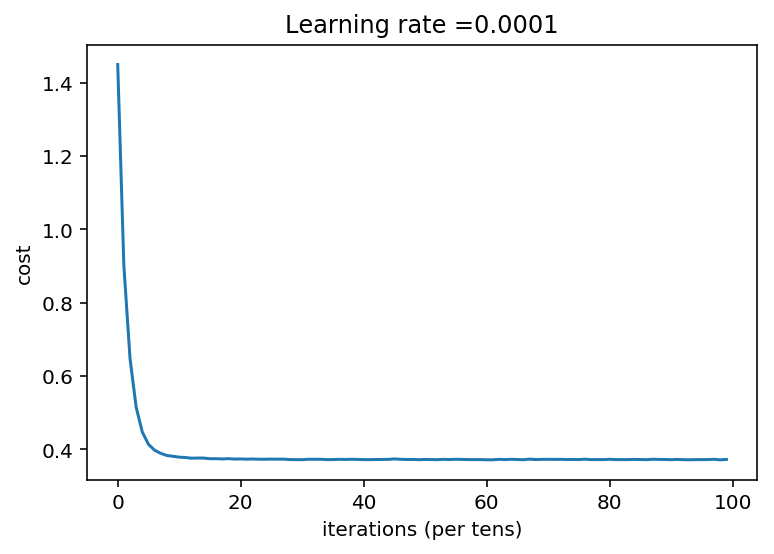

Parameters have been trained!
Train Accuracy: 0.85309994
Test Accuracy: 0.85071385


In [140]:
num1 = DNNtrain_X.shape[0]
parameters = model(DNNtrain_X, DNNtrain_y, DNNval_X, DNNval_y,num=num1,learning_rate = 0.0001, keep_prob=0.9,lamb=0.01,num_epochs = 500, minibatch_size=512, params = [256,128,2])

In [141]:
default_prob = get_probability(parameters, DNNval_X)[1,:]
roc_auc_score(DNNval_y[1,:], default_prob)

0.8146070440933283

In [142]:
default_prob = get_probability(parameters, DNNtest_X)[1,:]
roc_auc_score(DNNtest_y[1,:], default_prob)

0.8124466088017104

In [143]:
print(classification_report(DNNtest_y[1,:], default_prob>0.5))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      9160
         1.0       0.65      0.24      0.35      1783

   micro avg       0.85      0.85      0.85     10943
   macro avg       0.76      0.61      0.63     10943
weighted avg       0.83      0.85      0.82     10943



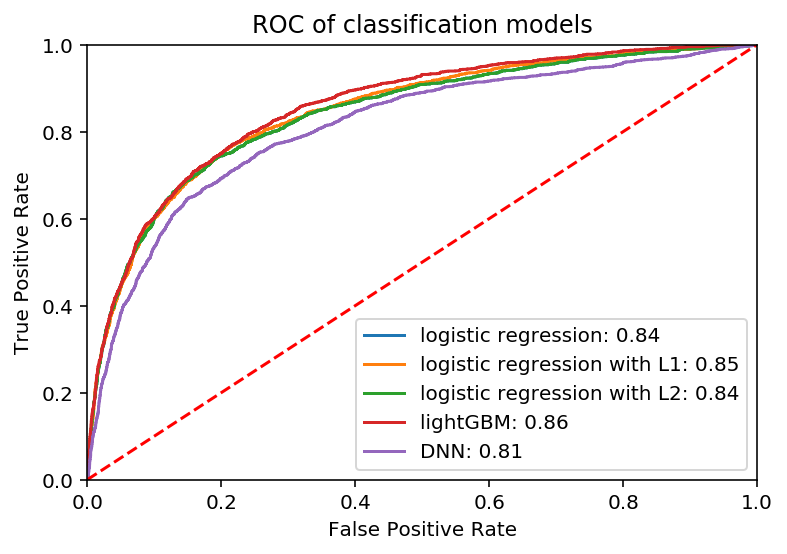

In [147]:
# ROC of all models

plt.title('ROC of classification models')
fpr, tpr, threshold = metrics.roc_curve(test_y, preds_log)
roc_auc1 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'logistic regression: %0.2f' % roc_auc1)

fpr, tpr, threshold = metrics.roc_curve(test_y, preds_log_l1)
roc_auc2 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'logistic regression with L1: %0.2f' % roc_auc2)

fpr, tpr, threshold = metrics.roc_curve(test_y, preds_log_l2)
roc_auc3 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'logistic regression with L2: %0.2f' % roc_auc3)

fpr, tpr, threshold = metrics.roc_curve(test_y, preds_log_lgbm)
roc_auc4 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'lightGBM: %0.2f' % roc_auc4)

fpr, tpr, threshold = metrics.roc_curve(test_y, default_prob)
roc_auc5 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'DNN: %0.2f' % roc_auc5)

plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Cost after epoch 0: 17504.457699
Cost after epoch 100: 109.061628
Cost after epoch 200: 93.162514
Cost after epoch 300: 90.435052
Cost after epoch 400: 67.341103


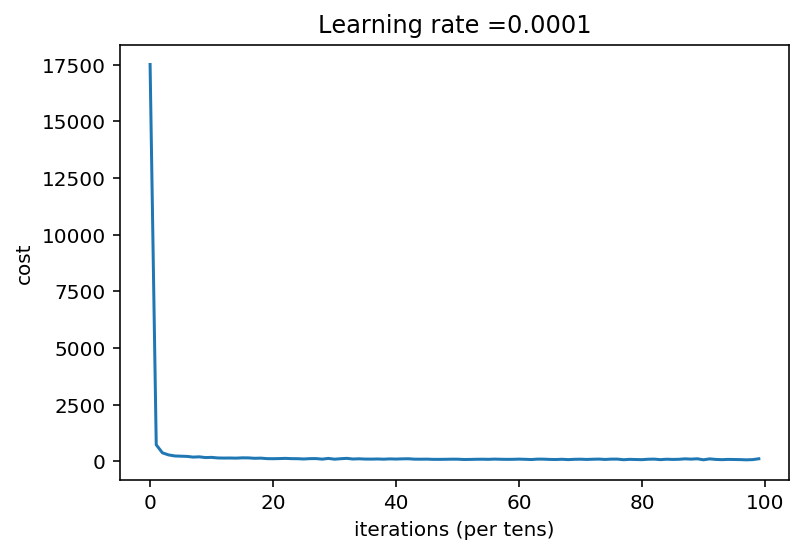

Parameters have been trained!
Train Accuracy: 0.8087812
Test Accuracy: 0.8065914


In [175]:
# cross validation
num1 = DNNtrain_X.shape[0]
learning_rates = [0.00001,0.0001,0.01,0.1]
params_all = [[100,50,2],[128,64,2],[64,32,2],[256,128,2],[256,64,2],[512,256,2],[512,128,2]]
keep_probs = [1,0.9,0.8]
lambs = [0.01,0.1,1,10]
minibatch_sizes = [256,512,1024]
epochs = [400,500,600]

aucl = []
for l in learning_rates:
    print('choose learning rate')
    print(l)
    parameters = model(DNNtrain_X, DNNtrain_y, DNNval_X, DNNval_y,num=num1,learning_rate=l)
    default_prob = get_probability(parameters, DNNval_X)[1,:]
    auc = roc_auc_score(DNNval_y[1,:], default_prob)
    aucl.append(auc)
    print(auc)
    print('----------------------------')
maxaucl = max(aucl)
bestl = learning_rates[aucl.index(maxaucl)]
print('Best learning rate: {}'.format(bestl))
print('Best AUC: {}'.format(maxaucl))

auck = []
for k in keep_probs:
    print('choose dropout prob')
    print(k)
    parameters = model(DNNtrain_X, DNNtrain_y, DNNval_X, DNNval_y,num=num1,learning_rate = bestl, keep_prob = k)
    default_prob = get_probability(parameters, DNNval_X)[1,:]
    auc = roc_auc_score(DNNval_y[1,:], default_prob)
    auck.append(auc)    
    print(auc)
    print('----------------------------')
maxauck = max(auck)
bestk = keep_probs[auck.index(maxauck)]
print('Best dropout prob: {}'.format(bestk))
print('Best AUC: {}'.format(maxauck))


aucp = []
for p in params_all:
    print('choose # nodes')
    print(p)
    parameters = model(DNNtrain_X, DNNtrain_y, DNNval_X, DNNval_y,num=num1,learning_rate = bestl, keep_prob = bestk, params = p)
    default_prob = get_probability(parameters, DNNval_X)[1,:]
    auc = roc_auc_score(DNNval_y[1,:], default_prob)
    aucp.append(auc)    
    print(auc)
    print('----------------------------')    
maxaucp = max(aucp)
bestp = params_all[aucp.index(maxaucp)]
print('Best # nodes: {}'.format(bestp))
print('Best AUC: {}'.format(maxaucp))


aucla = []    
for la in lambs:
    print('choose regularization param')
    print(la)
    parameters = model(DNNtrain_X, DNNtrain_y, DNNval_X, DNNval_y,num=num1,learning_rate = bestl, keep_prob = bestk, lamb = la, params = bestp)
    default_prob = get_probability(parameters, DNNval_X)[1,:]
    auc = roc_auc_score(DNNval_y[1,:], default_prob)
    aucla.append(auc)    
    print(auc)
    print('----------------------------')
maxaucla = max(aucla)
bestla = lambs[aucla.index(maxaucla)]
print('Best regularization param: {}'.format(bestla))
print('Best AUC: {}'.format(maxaucla))

aucmi = []
for mi in minibatch_sizes:
    print('choose minibatch size')
    print(mi)
    parameters = model(DNNtrain_X, DNNtrain_y, DNNval_X, DNNval_y,num=num1,learning_rate = bestl, keep_prob = bestk, lamb = bestla,minibatch_size = mi, params = bestp)
    default_prob = get_probability(parameters, DNNval_X)[1,:]
    auc = roc_auc_score(DNNval_y[1,:], default_prob)
    aucmi.append(auc)  
    print(auc)
    print('----------------------------')
maxaucmi = max(aucmi)
bestmi = minibatch_sizes[aucmi.index(maxaucmi)]
print('Best minibatch sizes: {}'.format(bestmi))
print('Best AUC: {}'.format(maxaucmi))

auce = []
for e in epochs:
    print('choose # epochs')
    print(e)
    parameters = model(DNNtrain_X, DNNtrain_y, DNNval_X, DNNval_y,num=num1,learning_rate = bestl, keep_prob = bestk, lamb = bestla,num_epochs = e,minibatch_size = mi, params = bestp)
    default_prob = get_probability(parameters, DNNval_X)[1,:]
    auc = roc_auc_score(DNNval_y[1,:], default_prob)
    auce.append(auc)  
    print(auc)
    print('----------------------------')
maxauce = max(auce)
beste = minibatch_sizes[auce.index(maxauce)]
print('Best # epochs: {}'.format(beste))
print('Best AUC: {}'.format(maxauce))   


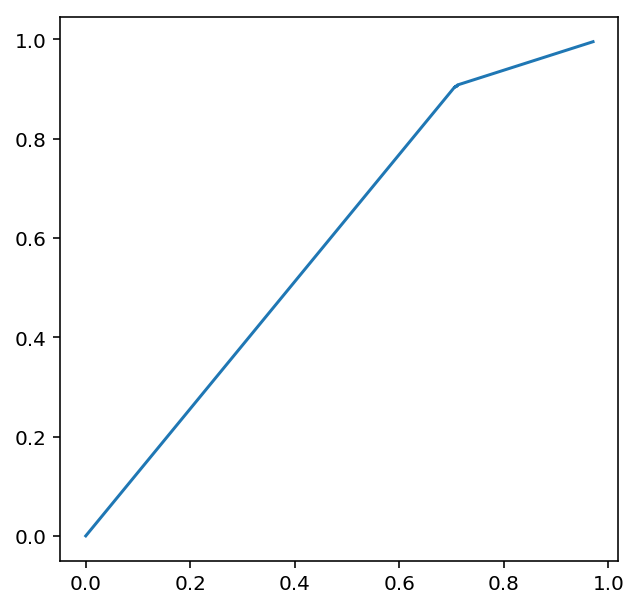

In [202]:
default_prob = get_probability(parameters, DNNval_X)[1,:]
n = 200
TPR = np.zeros((n,1))
FPR = np.zeros((n,1))
t = np.linspace(0.0, 1.0, n)
for i in range(n):
    TPR[i,0], FPR[i,0] = get_ROC(default_prob,t[i],DNNval_y[1,:])
plt.figure(figsize=(5,5))
plt.plot(FPR, TPR)

In [204]:
roc_auc_score(DNNval_y[1,:], default_prob)

0.6163920763297972

## Regression

In [176]:
regdata = rawdata[rawdata['target'] == 1]
# split the data
#y_reg = np.log(regdata['GrossChargeOffAmount'].values + 1)
# predict percentage
y_reg = regdata['severity'].values
X_reg = regdata[numCols+['age']+catCols]
train_X_reg, test_X_reg, train_y_reg, test_y_reg = train_test_split(X_reg,y_reg,test_size=0.2,random_state=1)
train_X_reg, val_X_reg, train_y_reg, val_y_reg = train_test_split(train_X_reg,train_y_reg,test_size=0.2,random_state=1)


### Linear Regression

In [177]:
starttime = time.time()
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numCols),
                                               ('cat', categorical_transformer, catCols)])
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])
lr.fit(train_X_reg, train_y_reg)
print('time: {}'.format(time.time()-starttime))
print(np.sqrt(metrics.mean_squared_error(val_y_reg, lr.predict(val_X_reg))))


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


time: 4.888794660568237
0.6684901359647913


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [178]:
print(np.sqrt(metrics.mean_squared_error(test_y_reg, lr.predict(test_X_reg))))

0.6871453501151329


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


### Lasso

In [11]:
from sklearn.linear_model import Lasso
alphas = [0.01,0.05,0.1,0.2]
for a in alphas:
    print('alpha: {}'.format(a))
    lasso = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor',  Lasso(alpha = a))])
    lasso.fit(train_X_reg, train_y_reg)
    print(np.sqrt(metrics.mean_squared_error(val_y_reg, lasso.predict(val_X_reg))))
    


alpha: 0.01


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Pytho

0.21338058838862148
alpha: 0.05


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.22812562276596624
alpha: 0.1


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2309741424196447
alpha: 0.2
0.2309741424196447


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [179]:
starttime = time.time()
lasso = Pipeline(steps=[('preprocessor', preprocessor),
                  ('regressor',  Lasso(alpha = 0.01))])
lasso.fit(train_X_reg, train_y_reg)
print('time: {}'.format(time.time()-starttime))
print(np.sqrt(metrics.mean_squared_error(test_y_reg, lasso.predict(test_X_reg))))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


time: 8.688517570495605
0.20552319526909807


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


### Ridge

In [12]:
alphas = [0.01,0.1,0.2,0.5]
for a in alphas:
    print('alpha: {}'.format(a))
    ridge = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor',  Ridge(alpha = a))])
    ridge.fit(train_X_reg, train_y_reg)
    print(np.sqrt(metrics.mean_squared_error(val_y_reg, ridge.predict(val_X_reg))))

alpha: 0.01


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Pytho

0.22012850619524946
alpha: 0.1


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.21926511380080366
alpha: 0.2


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.21837529883791307
alpha: 0.5
0.2161683411253842


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [180]:
starttime = time.time()
ridge = Pipeline(steps=[('preprocessor', preprocessor),
                  ('regressor',  Ridge(alpha = 0.5))])
ridge.fit(train_X_reg, train_y_reg)
print('time: {}'.format(time.time()-starttime))
print(np.sqrt(metrics.mean_squared_error(test_y_reg, ridge.predict(test_X_reg))))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


time: 2.925868511199951
0.2149112202458859


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


### Elastic Net

In [8]:
from sklearn.linear_model import ElasticNet
alphas = [0.01,0.05,0.1,0.2]
ratios = [0.1,0.3,0.5,0.7,0.9]
for a in alphas:
    for r in ratios:
        print('alpha: {}'.format(a))
        print('l1 ratio: {}'.format(r))
        elastic = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor',  ElasticNet(alpha = a,l1_ratio = r))])
        elastic.fit(train_X_reg, train_y_reg)
        print(np.sqrt(metrics.mean_squared_error(val_y_reg, elastic.predict(val_X_reg))))

alpha: 0.01
l1 ratio: 0.1


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Pytho

0.2049552925861022
alpha: 0.01
l1 ratio: 0.3


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.20801827632621087
alpha: 0.01
l1 ratio: 0.5


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.20990089638380519
alpha: 0.01
l1 ratio: 0.7


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2117467988377672
alpha: 0.01
l1 ratio: 0.9


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.21298806817039642
alpha: 0.05
l1 ratio: 0.1


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.21075888057735298
alpha: 0.05
l1 ratio: 0.3


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2160495275632121
alpha: 0.05
l1 ratio: 0.5


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2198261278140094
alpha: 0.05
l1 ratio: 0.7


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.22523488041937667
alpha: 0.05
l1 ratio: 0.9


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.22713767579627195
alpha: 0.1
l1 ratio: 0.1


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2149161689175363
alpha: 0.1
l1 ratio: 0.3


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.22291639203379413
alpha: 0.1
l1 ratio: 0.5


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2282474633550291
alpha: 0.1
l1 ratio: 0.7


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2309741424196447
alpha: 0.1
l1 ratio: 0.9


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2309741424196447
alpha: 0.2
l1 ratio: 0.1


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.21973477659773274
alpha: 0.2
l1 ratio: 0.3


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.23051492525741088
alpha: 0.2
l1 ratio: 0.5


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2309741424196447
alpha: 0.2
l1 ratio: 0.7


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.2309741424196447
alpha: 0.2
l1 ratio: 0.9
0.2309741424196447


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [181]:
starttime = time.time()
elastic = Pipeline(steps=[('preprocessor', preprocessor),
                  ('regressor',  ElasticNet(alpha = 0.01,l1_ratio = 0.1))])
elastic.fit(train_X_reg, train_y_reg)
print('time: {}'.format(time.time()-starttime))
print(np.sqrt(metrics.mean_squared_error(test_y_reg, elastic.predict(test_X_reg))))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


time: 23.761442184448242
0.19412783920688795


C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


### LightGBM

In [182]:
def run_lgb(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 10,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    lgb.plot_importance(model)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.173612
[200]	valid_0's rmse: 0.173001
Early stopping, best iteration is:
[184]	valid_0's rmse: 0.172804
time: 0.6250934600830078
0.17280353193539463


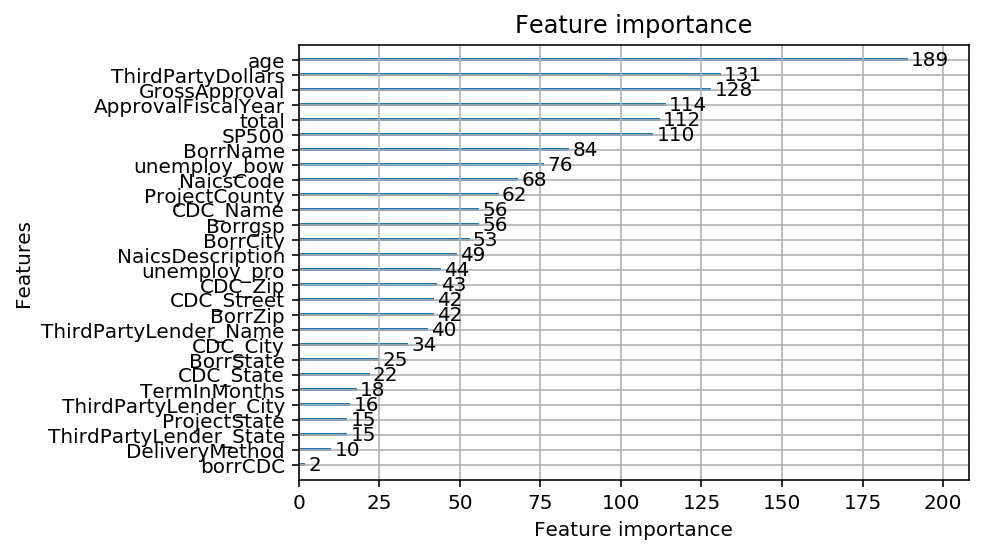

In [189]:
starttime = time.time()
modelR, pred_val_y = run_lgb(train_X_reg, train_y_reg, val_X_reg, val_y_reg)
print('time: {}'.format(time.time()-starttime))
print(np.sqrt(metrics.mean_squared_error(val_y_reg, pred_val_y)))

In [190]:
#modelR, pred_test_y = run_lgb(train_X_reg, train_y_reg, test_X_reg, test_y_reg)
pred_test_y = modelR.predict(test_X_reg)
print(np.sqrt(metrics.mean_squared_error(test_y_reg, pred_test_y)))

0.16381690107136393


In [24]:
# try to implement with pipeline

class LGBM_Regressor:
    def fit(self, train_X, train_y):
        self.train_X = train_X
        self.train_y = train_y
        return self
    def fit_predict(self,val_X,val_y):
        params = {
            "objective" : "regression",
            "metric" : "rmse", 
            "num_leaves" : 10,
            "min_child_samples" : 100,
            "learning_rate" : 0.1,
            "bagging_fraction" : 0.7,
            "feature_fraction" : 0.5,
            "bagging_frequency" : 5,
            "bagging_seed" : 2018,
        }

        lgtrain = lgb.Dataset(self.train_X, label=self.train_y)
        lgval = lgb.Dataset(val_X, label=val_y)
        model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
        pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
        return model, pred_val_y
lgbr = Pipeline(steps=[('preprocessor', preprocessor),
                  ('regressor',  LGBM_Regressor())])
lgbr.fit(train_X_reg,train_y_reg)
modelR, pred_val_y = lgbr.fit_predict(val_X_reg, val_y_reg)
print(np.sqrt(metrics.mean_squared_error(val_y_reg, pred_val_y)))

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 3.89982
[200]	valid_0's rmse: 3.89179
Early stopping, best iteration is:
[117]	valid_0's rmse: 3.89138
3.8913808992771632


### Loss Prediction on the Best Model

In [87]:
# 1 year
samples['age'] = samples['age1']
pred_X1 = samples[numCols+['age']+catCols]
pred_loss1 = modelR.predict(pred_X1)

In [88]:
# 5 year
samples['age'] = samples['age5']
pred_X5 = samples[numCols+['age']+catCols]
pred_loss5 = modelR.predict(pred_X5)

### XGboost

In [198]:
def run_xgb(X_train, y_train, X_val, y_val, X_test, y_test):
    params = {'objective': 'reg:linear',
              'eval_metric': 'rmse',
              'eta': 0.001,
              'max_depth': 10,
              'subsample': 0.6,
              'colsample_bytree': 0.6,
              'alpha':0.001,
              'random_state': 42,
              'silent': True}

    xgb_train_data = xgb.DMatrix(X_train.values, y_train.values)
    xgb_val_data = xgb.DMatrix(X_val.values, y_val.values)
    xgb_test_data = xgb.DMatrix(X_test.values, y_test.values)
    #xgb_submit_data = xgb.DMatrix(X_test)
    model = xgb.train(params, xgb_train_data, 
                      num_boost_round=2000, 
                      evals= [(xgb_train_data, 'train'), (xgb_val_data, 'valid')],
                      early_stopping_rounds=100, 
                      verbose_eval=500
                     )

    y_pred_train = model.predict(xgb_train_data, ntree_limit=model.best_ntree_limit)
    y_pred_val = model.predict(xgb_val_data, ntree_limit=model.best_ntree_limit)
    y_pred_test = model.predict(xgb_test_data, ntree_limit=model.best_ntree_limit)
    #y_pred_submit = model.predict(xgb_submit_data, ntree_limit=model.best_ntree_limit)

    return model, y_pred_val, y_pred_test

In [200]:
starttime = time.time()
xgb_model, xgb_preds_val, xgb_preds_test = run_xgb(train_X_reg, pd.DataFrame(train_y_reg), val_X_reg, pd.DataFrame(val_y_reg),test_X_reg, pd.DataFrame(test_y_reg))
print('time: {}'.format(time.time()-starttime))
print(np.sqrt(metrics.mean_squared_error(val_y_reg, xgb_preds_val)))
print(np.sqrt(metrics.mean_squared_error(test_y_reg, xgb_preds_test)))

[0]	train-rmse:0.271663	valid-rmse:0.266664
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[500]	train-rmse:0.201799	valid-rmse:0.216351
[1000]	train-rmse:0.158865	valid-rmse:0.191542
[1500]	train-rmse:0.132325	valid-rmse:0.179971
[1999]	train-rmse:0.114847	valid-rmse:0.174588
time: 37.94398045539856
0.17458794135121491
0.167976698081359


### DNN Regressor

In [99]:
data_scaler = StandardScaler()
train_num_r = train_X_reg[numCols]
data_scaler.fit(train_num_r)
train_num_r = data_scaler.transform(train_num_r)
val_num_r = data_scaler.transform(val_X_reg[numCols])
test_num_r = data_scaler.transform(test_X_reg[numCols])
train_num_r_df = pd.DataFrame(train_num_r,columns = numCols)
train_num_r_df.reset_index(inplace=True)
val_num_r_df = pd.DataFrame(val_num_r,columns = numCols)
val_num_r_df.reset_index(inplace=True)
test_num_r_df = pd.DataFrame(test_num_r,columns = numCols)
test_num_r_df.reset_index(inplace=True)

C:\Users\THINKPAD\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [102]:
one_hot = OneHotEncoder(handle_unknown='ignore')
train_cat_r = one_hot.fit_transform(train_X_reg[catCols]).toarray()
val_cat_r = one_hot.transform(val_X_reg[catCols]).toarray()
test_cat_r = one_hot.transform(test_X_reg[catCols]).toarray()
feature_names = [str(i) for i in list(one_hot.get_feature_names())]
train_cat_r_df = pd.DataFrame(train_cat_r,columns = feature_names)
train_cat_r_df.reset_index(inplace=True)
val_cat_r_df = pd.DataFrame(val_cat_r,columns = feature_names)
val_cat_r_df.reset_index(inplace=True)
test_cat_r_df = pd.DataFrame(test_cat_r,columns = feature_names)
test_cat_r_df.reset_index(inplace=True)
newcatCols = list(train_cat_r_df.columns)
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in numCols+newcatCols]

In [103]:
train_dnn_r = pd.concat([train_num_r_df,train_cat_r_df],axis = 1)
val_dnn_r = pd.concat([val_num_r_df,val_cat_r_df],axis = 1)
test_dnn_r = pd.concat([test_num_r_df,test_cat_r_df],axis = 1)

In [104]:
train_dnn_r.shape

(5748, 13309)

In [105]:
train_dnn_r_columns = list(train_dnn_r.columns)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {k: train_dnn_r[k].values for k in train_dnn_r_columns},
    y = train_y_reg,
    batch_size=512,
    num_epochs=500,
    shuffle=False,
)
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {k: val_dnn_r[k].values for k in train_dnn_r_columns},
    y = val_y_reg,
    batch_size=512,
    num_epochs=500,
    shuffle=False
)

In [106]:

regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols, 
                                          hidden_units=[256, 128], 
                                          #model_dir='./models/dnnregressor'
                                     )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\THINKPAD\\AppData\\Local\\Temp\\tmpqo_av6ng', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C8EA14F208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
regressor.train(input_fn=train_input_fn, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


## Simulation

In [67]:
total = list(samples['total'])
alltotal = sum(total)

In [90]:
import random
random.seed(0)
# year 1
allloss1 = []

for i in range(1000):
    simloss = []
    for j in range(500):
        rand =random.random()
        if rand <= pred_prob1[j]:
            simloss.append(pred_loss1[j]*total[j])
        else:
            simloss.append(0)
    allloss1.append(simloss)
sumloss1 = [sum(i)/alltotal*100 for i in allloss1]

Text(0.5, 1.0, 'distribution of 1 year % loss of loans of one simulation')

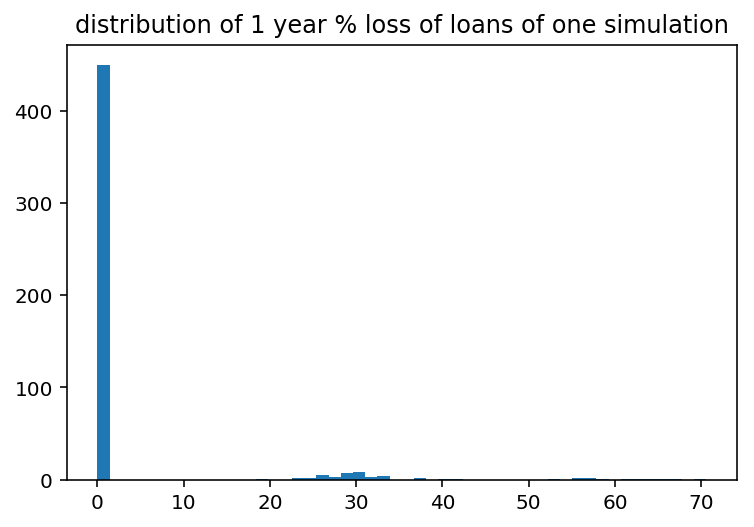

In [103]:
# distribution of 500 loans of one simulation
_,__,___ = plt.hist([allloss1[6][i]/total[i]*100 for i in range(500)],bins = 50)
plt.title('distribution of 1 year % loss of loans of one simulation')

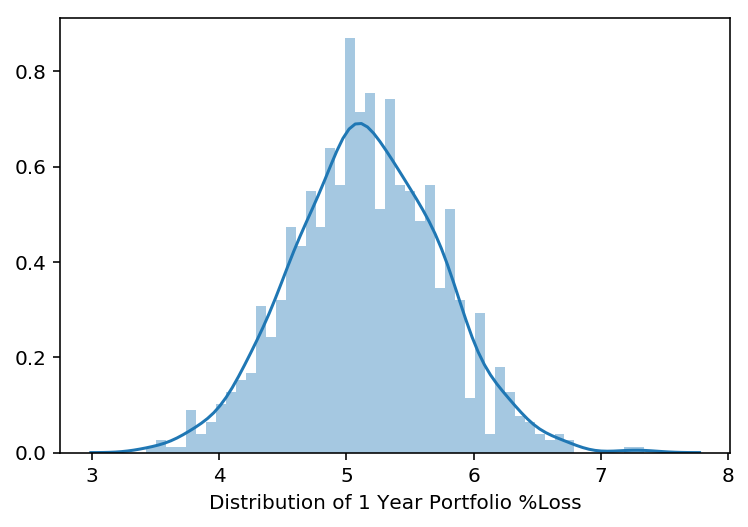

In [95]:
sns.distplot(sumloss1,bins = 50,axlabel = 'Distribution of 1 Year Portfolio %Loss')

In [96]:
# year 5
allloss5 = []
for i in range(1000):
    simloss = []
    for j in range(500):
        rand =random.random()
        if rand <= pred_prob5[j]:
            simloss.append(pred_loss5[j]*total[j])
        else:
            simloss.append(0)
    allloss5.append(simloss)
sumloss5 = [sum(i)/alltotal*100 for i in allloss5]

Text(0.5, 1.0, 'distribution of 5 year % loss of loans of one simulation')

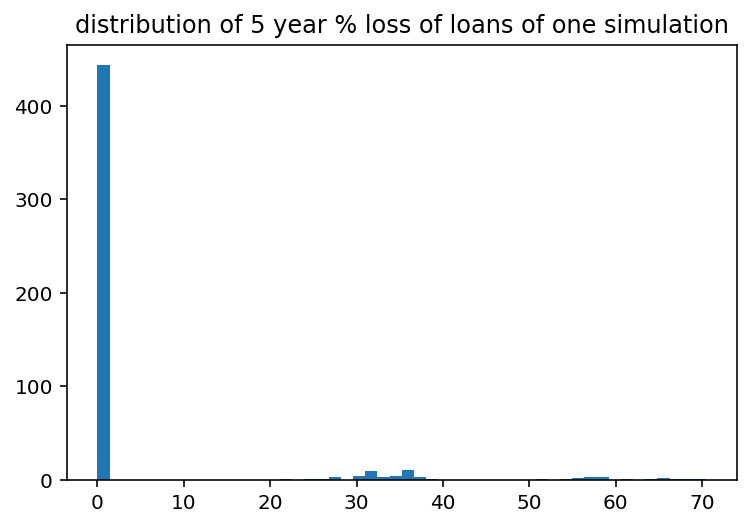

In [107]:
# distribution of 500 loans of one simulation
_,__,___ = plt.hist([allloss5[7][i]/total[i]*100 for i in range(500)],bins = 50)
plt.title('distribution of 5 year % loss of loans of one simulation')

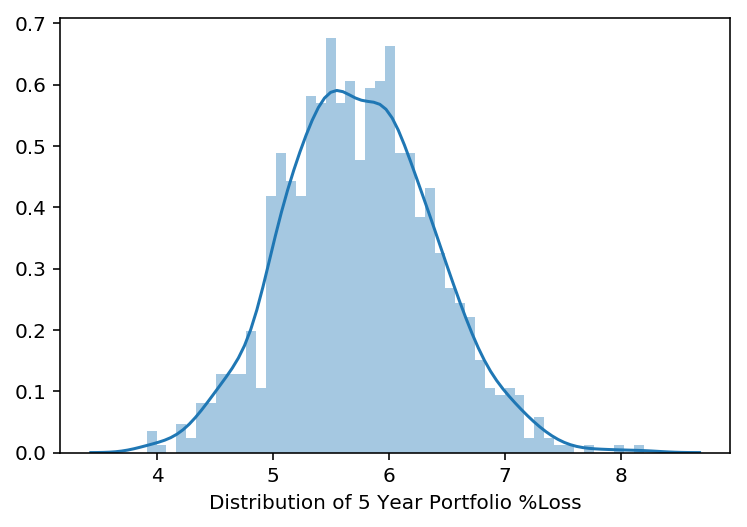

In [97]:
sns.distplot(sumloss5,bins = 50,axlabel = 'Distribution of 5 Year Portfolio %Loss')

## VaR

In [44]:
# year 1
sumloss1 = sorted(sumloss1)
# 95% VaR
var195 = sumloss1[950-1]
print('95% VaR: {}'.format(var195))
# 90% VaR
var190 = sumloss1[900-1]
print('90% VaR: {}'.format(var190))

95% VaR: 6.082324893041458
90% VaR: 5.887289171130403


In [45]:
# year 5
sumloss5 = sorted(sumloss5)
# 95% VaR
var595 = sumloss5[950-1]
print('95% VaR: {}'.format(var595))
# 90% VaR
var590 = sumloss5[900-1]
print('90% VaR: {}'.format(var590))

95% VaR: 6.812208193005478
90% VaR: 6.571126996063757


In [46]:
# Average VaR
# year 1
sumloss1 = sorted(sumloss1)
# 95% Average VaR
avar195 = 0
for i in range(0,50,10):
    avar195 += sumloss1[1000-i-1]
avar195 = avar195/(1/0.05)
print('95% Average VaR: {}'.format(avar195))
# 90% Average VaR
avar190 = 0
for i in range(0,100,10):
    avar190 += sumloss1[1000-i-1]
avar190 = avar190/(1/0.1)
print('90% Average VaR: {}'.format(avar190))

95% Average VaR: 1.6346815426383992
90% Average VaR: 6.2690851864256985


In [47]:
# Average VaR
# year 5
sumloss5 = sorted(sumloss5)
# 95% Average VaR
avar595 = 0
for i in range(0,50,10):
    avar595 += sumloss5[1000-i-1]
avar595 = avar595/(1/0.05)
print('95% Average VaR: {}'.format(avar595))
# 90% Average VaR
avar590 = 0
for i in range(0,100,10):
    avar590 += sumloss5[1000-i-1]
avar590 = avar590/(1/0.1)
print('90% Average VaR: {}'.format(avar590))

95% Average VaR: 1.823555452669914
90% Average VaR: 6.996535799470867


## Tranche

Text(0.5, 1.0, 'Distribution of 1 Year 5% - 15% Tranche Loss')

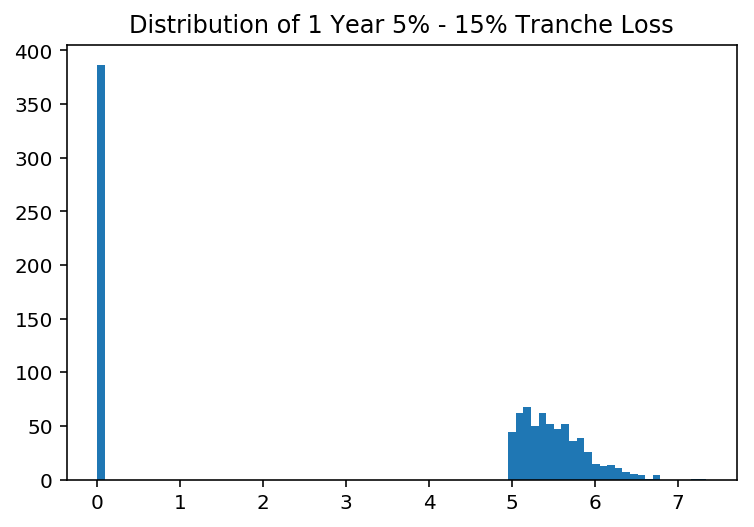

In [58]:
# 5% - 15%
# year 1
investor1 = []
for i in range(1000):
    if sumloss1[i] >= 5 and sumloss1[i] <= 15:
        investor1.append(sumloss1[i])
    else:
        investor1.append(0)
#sns.distplot(investor1,bins = 50,axlabel = 'Distribution of 1 Year 5% - 15% Tranche Loss')
_,__,___ = plt.hist(investor1,bins = 80)
plt.title('Distribution of 1 Year 5% - 15% Tranche Loss')

Text(0.5, 1.0, 'Distribution of 5 Year 5% - 15% Tranche Loss')

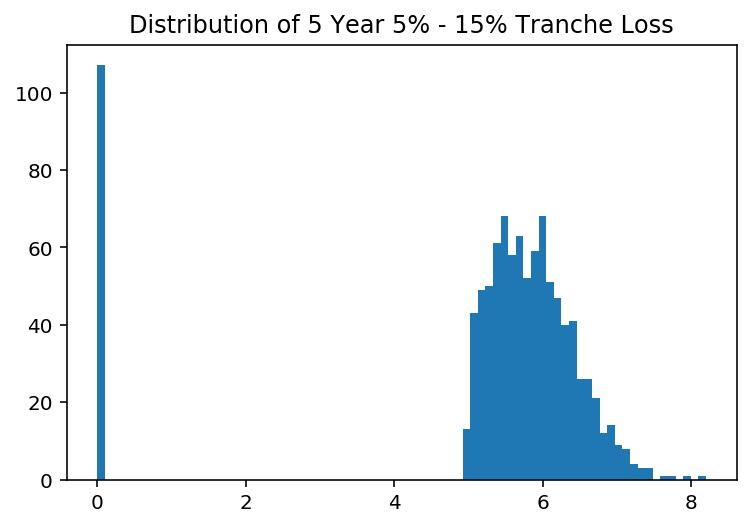

In [59]:
# year 5
investor5 = []
for i in range(1000):
    if sumloss5[i] >= 5 and sumloss5[i] <= 15:
        investor5.append(sumloss5[i])
    else:
        investor5.append(0)
#sns.distplot(investor5,bins = 50,axlabel = 'Distribution of 5 Year 5% - 15% Tranche Loss')
_,__,___ = plt.hist(investor5,bins = 80)
plt.title('Distribution of 5 Year 5% - 15% Tranche Loss')

Text(0.5, 1.0, 'Distribution of 1 Year 15% - 100% Tranche Loss')

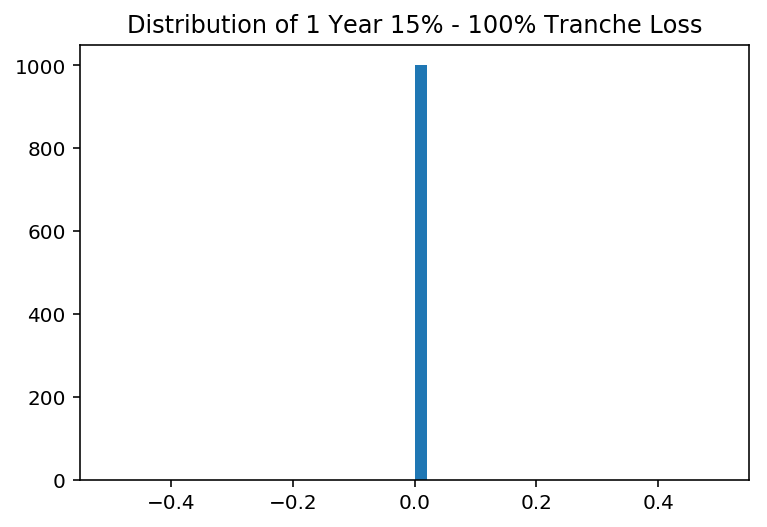

In [54]:
# 15% - 100%
# year 1
investor1 = []
for i in range(1000):
    if sumloss1[i] >= 15 and sumloss1[i] <= 100:
        investor1.append(sumloss1[i])
    else:
        investor1.append(0)
_,__,___ = plt.hist(investor1,bins = 50)
plt.title('Distribution of 1 Year 15% - 100% Tranche Loss')

Text(0.5, 1.0, 'Distribution of 5 Year 15% - 100% Tranche Loss')

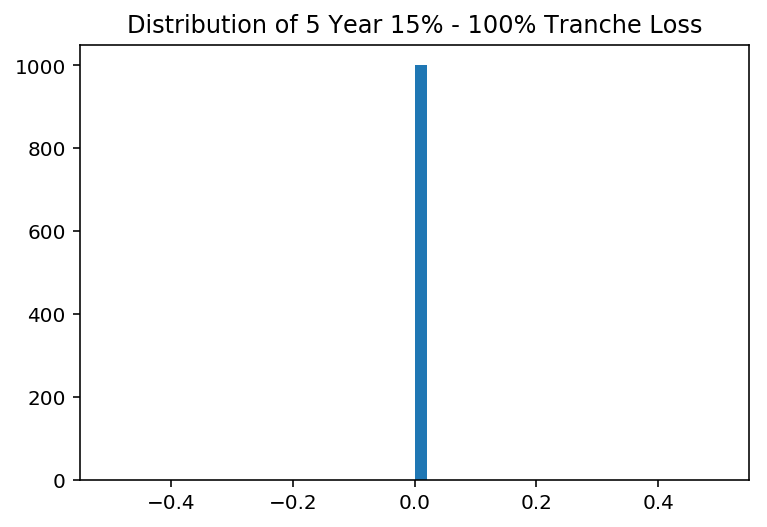

In [53]:
# year 5
investor5 = []
for i in range(1000):
    if sumloss5[i] >= 15 and sumloss5[i] <= 100:
        investor5.append(sumloss5[i])
    else:
        investor5.append(0)

_,__,___ = plt.hist(investor5,bins = 50)
plt.title('Distribution of 5 Year 15% - 100% Tranche Loss')